Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Load and Display Metrics

In [3]:
output_dir = 'classifier_result'
csv_path = os.path.join(output_dir, 'metrics.csv')

if os.path.exists(csv_path):
    df_results = pd.read_csv(csv_path)
    print("=== Model Evaluation Metrics ===")
    display(df_results)
else:
    print("Metrics file not found. Run Classification.ipynb first.")

=== Model Evaluation Metrics ===


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,1.000000,1.000000,1.000000,1.000000
1,MLP,1.000000,1.000000,1.000000,1.000000
2,Random Forest,1.000000,1.000000,1.000000,1.000000
3,SVM (RBF),0.993056,0.993243,0.993056,0.993054
4,KNN,0.986111,0.986842,0.986111,0.986201
5,Decision Tree,0.951389,0.952454,0.951389,0.951659
6,Naïve Bayes,0.826389,0.860977,0.826389,0.821471


Plot Confusion Matrices

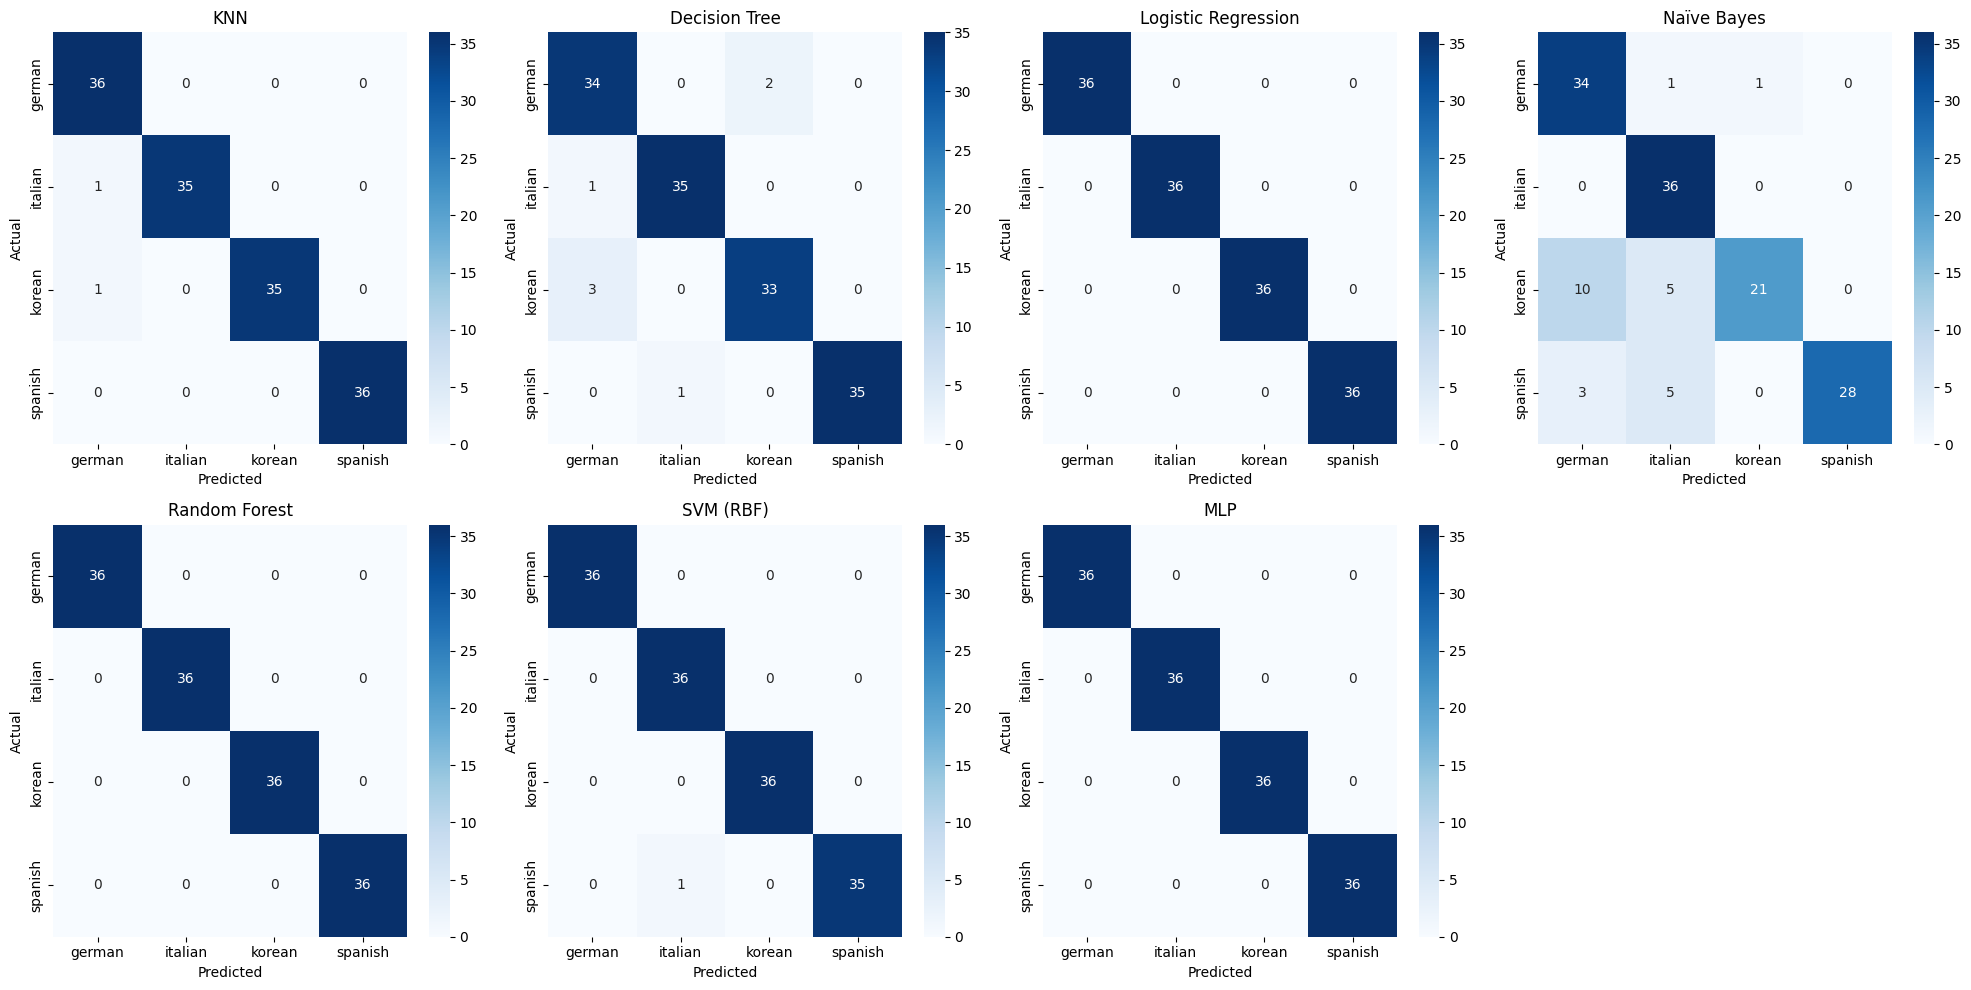

In [4]:
# Load confusion matrices data
npy_path = os.path.join(output_dir, 'confusion_matrices.npy')

if os.path.exists(npy_path):
    data = np.load(npy_path, allow_pickle=True).item()
    cms = data['cms']
    class_names = data['classes']
    
    num_models = len(cms)
    cols = 4
    rows = (num_models + cols - 1) // cols
    
    plt.figure(figsize=(20, 5 * rows))
    
    for i, (model_name, cm) in enumerate(cms.items()):
        plt.subplot(rows, cols, i + 1)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=class_names, yticklabels=class_names)
        plt.title(f'{model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Confusion matrix data not found. Run Classification.ipynb first.")